<a href="https://colab.research.google.com/github/milkadata/Classification-Model-2023/blob/main/College_Data%20Focusing%20on%20Women%20and%20Diverse%20Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2. Week 8/DATA/COLLEGE ACCEPTANCE.csv')
df


,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0,79.0,59.0,502.0,580.0,490.0,570.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,The Kingâ€™s College,3033.0,2158.0,127.0,57.0,45.0,540.0,630.0,510.0,600.0,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,Ottawa University-Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,Providence Christian College,122.0,65.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 108 entries, Name to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(97), object(11)
memory usage: 1.3+ MB


In [5]:
column_names = df.columns.tolist()
column_names

['Name',
 'Applicants total',
 'Admissions total',
 'Enrolled total',
 'Percent of freshmen submitting SAT scores',
 'Percent of freshmen submitting ACT scores',
 'SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score',
 'ACT Composite 25th percentile score',
 'ACT Composite 75th percentile score',
 'Estimated enrollment, total',
 'Estimated enrollment, full time',
 'Estimated enrollment, part time',
 'Estimated undergraduate enrollment, total',
 'Estimated undergraduate enrollment, full time',
 'Estimated undergraduate enrollment, part time',
 'Estimated freshman undergraduate enrollment, total',
 'Estimated freshman enrollment, full time',
 'Estimated freshman enrollment, part time',
 'Estimated graduate enrollment, total',
 'Estimated graduate enrollment, full time',
 'Estimated graduate enrollment, part

#Deleted unnecessary columns.

In [6]:
df = df[['Name','Applicants total','Admissions total','Enrolled total','Percent of freshmen submitting SAT scores', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score', "Number of students receiving an Associate's degree", 'Percent admitted - total', 'Tuition and fees, 2013-14', 'Total price for in-state students living on campus 2013-14', 'Total price for out-of-state students living on campus 2013-14',
 'State abbreviation', 'Level of institution',
 'Historically Black College or University',
 'Total  enrollment',
 'Full-time enrollment',
 'Part-time enrollment',
 'Undergraduate enrollment',
 'Graduate enrollment',
 'Full-time undergraduate enrollment',
 'Percent of total enrollment that are Black or African American',
 'Percent of total enrollment that are Hispanic/Latino',
 'Percent of total enrollment that are women',
 'Percent of undergraduate enrollment that are women',
 'Number of first-time undergraduates - in-state',
 'Percent of freshmen receiving any financial aid']]
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,...,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Number of first-time undergraduates - in-state,Percent of freshmen receiving any financial aid
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,370.0,450.0,350.0,450.0,NaN,...,581.0,4051.0,969.0,3799.0,92.0,1.0,55.0,51.0,NaN,97.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,520.0,640.0,520.0,650.0,NaN,...,6607.0,11502.0,7066.0,8357.0,21.0,3.0,61.0,58.0,1529.0,90.0
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,308.0,322.0,309.0,202.0,40.0,1.0,58.0,61.0,NaN,100.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,510.0,640.0,510.0,650.0,NaN,...,2574.0,5696.0,1680.0,4237.0,12.0,3.0,44.0,44.0,514.0,87.0
4,Alabama State University,10245.0,5251.0,1479.0,18.0,380.0,480.0,370.0,480.0,NaN,...,893.0,5356.0,719.0,4872.0,91.0,1.0,61.0,59.0,903.0,93.0


#Deleted duplicate rows.

In [7]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#Identified and addressed missing values.

In [8]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 4982 missing values.


In [9]:
# Check for missing values. You should produce an output that shows the number of missing values for each feature.
df.isna().sum()

Name                                                                0
Applicants total                                                  157
Admissions total                                                  157
Enrolled total                                                    157
Percent of freshmen submitting SAT scores                         277
SAT Critical Reading 25th percentile score                        365
SAT Critical Reading 75th percentile score                        365
SAT Math 25th percentile score                                    352
SAT Math 75th percentile score                                    352
SAT Writing 25th percentile score                                 820
SAT Writing 75th percentile score                                 820
Number of students receiving an Associate's degree                  2
Percent admitted - total                                          158
Tuition and fees, 2013-14                                          37
Total price for in-s

In [10]:
#drop the following columns baue way too many missing rows
df.drop(columns=['SAT Writing 25th percentile score','SAT Writing 75th percentile score','Number of first-time undergraduates - in-state'], inplace=True)
df.isna().sum()

<ipython-input-10-0b8acf336b2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SAT Writing 25th percentile score','SAT Writing 75th percentile score','Number of first-time undergraduates - in-state'], inplace=True)


Name                                                                0
Applicants total                                                  157
Admissions total                                                  157
Enrolled total                                                    157
Percent of freshmen submitting SAT scores                         277
SAT Critical Reading 25th percentile score                        365
SAT Critical Reading 75th percentile score                        365
SAT Math 25th percentile score                                    352
SAT Math 75th percentile score                                    352
Number of students receiving an Associate's degree                  2
Percent admitted - total                                          158
Tuition and fees, 2013-14                                          37
Total price for in-state students living on campus 2013-14        134
Total price for out-of-state students living on campus 2013-14    134
State abbreviation  

In [11]:
df = df.fillna('missing')
df.isna().sum()

Name                                                              0
Applicants total                                                  0
Admissions total                                                  0
Enrolled total                                                    0
Percent of freshmen submitting SAT scores                         0
SAT Critical Reading 25th percentile score                        0
SAT Critical Reading 75th percentile score                        0
SAT Math 25th percentile score                                    0
SAT Math 75th percentile score                                    0
Number of students receiving an Associate's degree                0
Percent admitted - total                                          0
Tuition and fees, 2013-14                                         0
Total price for in-state students living on campus 2013-14        0
Total price for out-of-state students living on campus 2013-14    0
State abbreviation                              

#Identified and corrected inconsistencies in data for categorical values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Name                                                            1534 non-null   object
 1   Applicants total                                                1534 non-null   object
 2   Admissions total                                                1534 non-null   object
 3   Enrolled total                                                  1534 non-null   object
 4   Percent of freshmen submitting SAT scores                       1534 non-null   object
 5   SAT Critical Reading 25th percentile score                      1534 non-null   object
 6   SAT Critical Reading 75th percentile score                      1534 non-null   object
 7   SAT Math 25th percentile score                              

In [13]:
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,Number of students receiving an Associate's degree,...,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of freshmen receiving any financial aid
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,370.0,450.0,350.0,450.0,0.0,...,4439.0,581.0,4051.0,969.0,3799.0,92.0,1.0,55.0,51.0,97.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,520.0,640.0,520.0,650.0,0.0,...,11961.0,6607.0,11502.0,7066.0,8357.0,21.0,3.0,61.0,58.0,90.0
2,Amridge University,missing,missing,missing,missing,missing,missing,missing,missing,5.0,...,323.0,308.0,322.0,309.0,202.0,40.0,1.0,58.0,61.0,100.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,510.0,640.0,510.0,650.0,0.0,...,4802.0,2574.0,5696.0,1680.0,4237.0,12.0,3.0,44.0,44.0,87.0
4,Alabama State University,10245.0,5251.0,1479.0,18.0,380.0,480.0,370.0,480.0,0.0,...,5182.0,893.0,5356.0,719.0,4872.0,91.0,1.0,61.0,59.0,93.0


In [14]:
# Convert column 'Percent of freshmen submitting SAT scores' to numeric
df["Number of students receiving an Associate's degree"] = pd.to_numeric(df['Percent of freshmen submitting SAT scores'], errors='coerce')  
average_assoc = df["Number of students receiving an Associate's degree"].mean()  
df["Number of students receiving an Associate's degree"].fillna(average_assoc, inplace=True) 


df["Total  enrollment"] = pd.to_numeric(df['Total  enrollment'], errors='coerce')  
average_assoc = df["Total  enrollment"].mean()  
df["Total  enrollment"].fillna(average_assoc, inplace=True) 

df["Full-time enrollment"] = pd.to_numeric(df['Percent of freshmen submitting SAT scores'], errors='coerce')  
average_assoc = df["Full-time enrollment"].mean()  
df["Full-time enrollment"].fillna(average_assoc, inplace=True) 

df["Part-time enrollment"] = pd.to_numeric(df['Part-time enrollment'], errors='coerce')  
average_assoc = df["Part-time enrollment"].mean()  
df["Part-time enrollment"].fillna(average_assoc, inplace=True) 

df["Undergraduate enrollment"] = pd.to_numeric(df['Undergraduate enrollment'], errors='coerce')  
average_assoc = df["Undergraduate enrollment"].mean()  
df["Undergraduate enrollment"].fillna(average_assoc, inplace=True) 

df["Graduate enrollment"] = pd.to_numeric(df['Graduate enrollment'], errors='coerce')  
average_assoc = df["Graduate enrollment"].mean()  
df["Graduate enrollment"].fillna(average_assoc, inplace=True) 

df["Full-time undergraduate enrollment"] = pd.to_numeric(df['Full-time undergraduate enrollment'], errors='coerce')  
average_assoc = df["Full-time undergraduate enrollment"].mean()  
df["Full-time undergraduate enrollment"].fillna(average_assoc, inplace=True) 

df["Percent of total enrollment that are Black or African American"] = pd.to_numeric(df['Percent of total enrollment that are Black or African American'], errors='coerce')  
average_assoc = df["Percent of total enrollment that are Black or African American"].mean()  
df["Percent of total enrollment that are Black or African American"].fillna(average_assoc, inplace=True) 

df["Percent of total enrollment that are Hispanic/Latino"] = pd.to_numeric(df['Percent of total enrollment that are Hispanic/Latino'], errors='coerce')  
average_assoc = df["Percent of total enrollment that are Hispanic/Latino"].mean()  
df["Percent of total enrollment that are Hispanic/Latino"].fillna(average_assoc, inplace=True) 

df["Percent of total enrollment that are women"] = pd.to_numeric(df['Percent of total enrollment that are women'], errors='coerce')  
average_assoc = df["Percent of total enrollment that are women"].mean()  
df["Percent of total enrollment that are women"].fillna(average_assoc, inplace=True) 

df["Percent of freshmen submitting SAT scores"] = pd.to_numeric(df['Percent of freshmen submitting SAT scores'], errors='coerce')  
average_assoc = df["Percent of freshmen submitting SAT scores"].mean()  
df["Percent of freshmen submitting SAT scores"].fillna(average_assoc, inplace=True) 

df["Admissions total"] = pd.to_numeric(df['Admissions total'], errors='coerce')  
average_assoc = df["Admissions total"].mean()  
df["Admissions total"].fillna(average_assoc, inplace=True) 


In [29]:
pd.set_option('display.max_columns', None)
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,Number of students receiving an Associate's degree,Percent admitted - total,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Level of institution,Historically Black College or University,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of freshmen receiving any financial aid
0,Alabama A & M University,6142.0,5521.000000,1104.0,15.000000,370.0,450.0,350.0,450.0,15.000000,90.0,7182.0,21849.0,27441.0,Alabama,Four or more years,Yes,5020.0,15.000000,581.0,4051.0,969.0,3799.0,92.0,1.0,55.0,51.0,97.0
1,University of Alabama at Birmingham,5689.0,4934.000000,1773.0,6.000000,520.0,640.0,520.0,650.0,6.000000,87.0,7206.0,22495.0,31687.0,Alabama,Four or more years,No,18568.0,6.000000,6607.0,11502.0,7066.0,8357.0,21.0,3.0,61.0,58.0,90.0
2,Amridge University,missing,3554.880174,missing,53.927605,missing,missing,missing,missing,53.927605,missing,6870.0,missing,missing,Alabama,Four or more years,No,631.0,53.927605,308.0,322.0,309.0,202.0,40.0,1.0,58.0,61.0,100.0
3,University of Alabama in Huntsville,2054.0,1656.000000,651.0,34.000000,510.0,640.0,510.0,650.0,34.000000,81.0,9192.0,23466.0,35780.0,Alabama,Four or more years,No,7376.0,34.000000,2574.0,5696.0,1680.0,4237.0,12.0,3.0,44.0,44.0,87.0
4,Alabama State University,10245.0,5251.000000,1479.0,18.000000,380.0,480.0,370.0,480.0,18.000000,51.0,8720.0,18286.0,25222.0,Alabama,Four or more years,Yes,6075.0,18.000000,893.0,5356.0,719.0,4872.0,91.0,1.0,61.0,59.0,93.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   Applicants total                                                1534 non-null   object 
 2   Admissions total                                                1534 non-null   float64
 3   Enrolled total                                                  1534 non-null   object 
 4   Percent of freshmen submitting SAT scores                       1534 non-null   float64
 5   SAT Critical Reading 25th percentile score                      1534 non-null   object 
 6   SAT Critical Reading 75th percentile score                      1534 non-null   object 
 7   SAT Math 25th percentile score                     

#Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

- NO CATEGORICAL VALUES

#Produced univariate visuals for the target and all features.

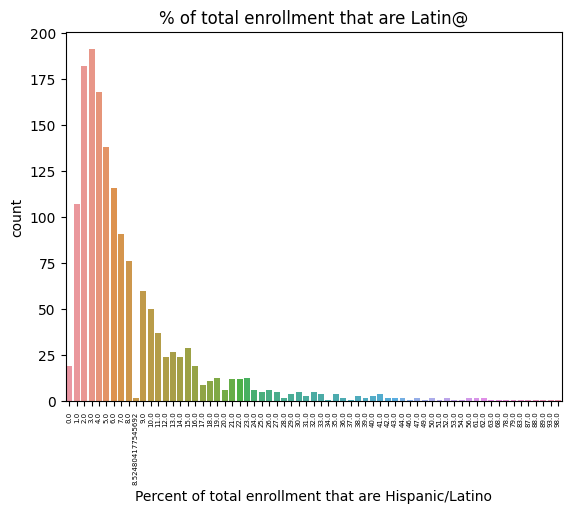

In [16]:
# Check univariate distributions and explore categorical variable(s)
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=df['Percent of total enrollment that are Hispanic/Latino'])
ax.set_title('% of total enrollment that are Latin@')
ax.tick_params(axis='x', rotation=90, labelsize=5)

plt.show()

Text(0, 0.5, '# of schools')

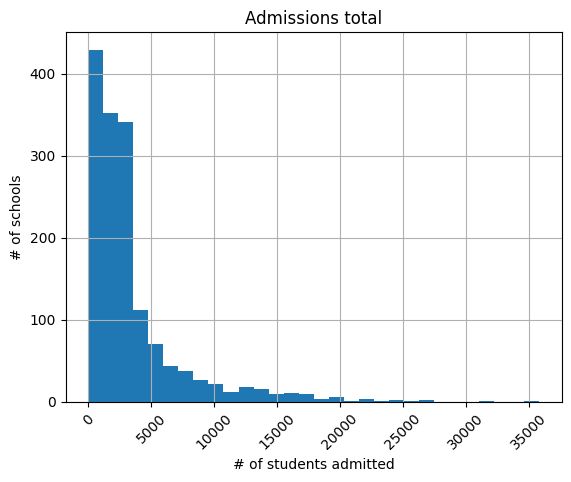

In [17]:
#histogram
ax = df['Admissions total'].hist(bins = 30)
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Admissions total')

plt.xlabel('# of students admitted')
plt.ylabel('# of schools')

#Identified outliers.

In [18]:
stats= df.describe()
print(stats)

       Admissions total  Percent of freshmen submitting SAT scores  \
count       1534.000000                                1534.000000   
mean        3554.880174                                  53.927605   
std         4082.824876                                  31.123960   
min            0.000000                                   0.000000   
25%         1027.500000                                  24.000000   
50%         2337.500000                                  53.927605   
75%         3811.000000                                  82.000000   
max        35815.000000                                 100.000000   

       Number of students receiving an Associate's degree  Total  enrollment  \
count                                        1534.000000         1534.000000   
mean                                           53.927605         7070.114230   
std                                            31.123960         9410.394293   
min                                             0

###Analysis on % of Women enrolled + Black Students

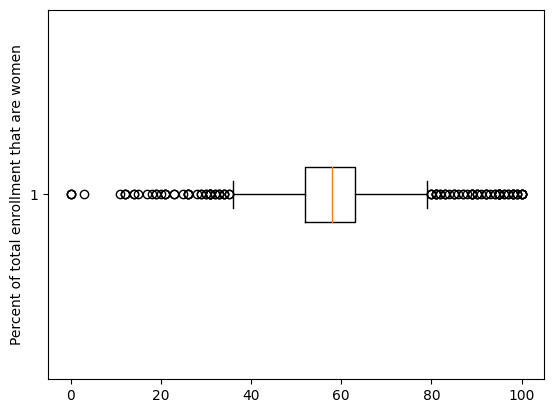

In [19]:
# making the boxplot horizontal
fig, ax = plt.subplots()
data = df["Percent of total enrollment that are women"]
ax.boxplot(data, vert = False);
ax.set_ylabel("Percent of total enrollment that are women");

###Schools were 90% of enrollments are women

In [20]:
df.loc[df['Percent of total enrollment that are women'] > 90]

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,Number of students receiving an Associate's degree,...,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of freshmen receiving any financial aid
14,Judson College,268.0,198.0,68.0,10.000000,550.0,640.0,500.0,600.0,10.000000,...,10.000000,85.0,347.0,0.0,262.0,14.0,1.0,95.0,95.0,100.0
112,Mills College,1827.0,1242.0,217.0,86.000000,540.0,640.0,500.0,610.0,86.000000,...,86.000000,171.0,985.0,610.0,922.0,8.0,18.0,92.0,100.0,100.0
114,Mount St Mary's College,2316.0,1716.0,559.0,91.000000,420.0,510.0,420.0,520.0,91.000000,...,91.000000,766.0,2625.0,649.0,2092.0,8.0,53.0,91.0,94.0,100.0
132,Scripps College,2378.0,849.0,272.0,73.000000,640.0,733.0,640.0,720.0,73.000000,...,73.000000,13.0,990.0,19.0,979.0,3.0,8.0,99.0,100.0,61.0
191,Trinity Washington University,1493.0,781.0,276.0,53.927605,missing,missing,missing,missing,53.927605,...,53.927605,1205.0,1853.0,653.0,1199.0,70.0,11.0,92.0,95.0,99.0
231,Agnes Scott College,1340.0,896.0,254.0,53.927605,missing,missing,missing,missing,53.927605,...,53.927605,18.0,915.0,0.0,897.0,33.0,9.0,99.0,99.0,100.0
264,Spelman College,6081.0,2312.0,523.0,74.000000,470.0,570.0,460.0,540.0,74.000000,...,74.000000,68.0,2129.0,0.0,2061.0,85.0,0.0,100.0,100.0,90.0
270,Wesleyan College,779.0,338.0,117.0,81.000000,450.0,570.0,430.0,560.0,81.000000,...,81.000000,183.0,651.0,49.0,468.0,33.0,4.0,95.0,96.0,100.0
373,Saint Mary-of-the-Woods College,325.0,317.0,64.0,69.000000,390.0,520.0,390.0,500.0,69.000000,...,69.000000,339.0,649.0,238.0,384.0,4.0,1.0,95.0,97.0,100.0
374,Saint Mary's College,1529.0,1310.0,437.0,45.000000,500.0,610.0,490.0,600.0,45.000000,...,45.000000,10.0,1479.0,0.0,1469.0,1.0,12.0,100.0,100.0,98.0


In [21]:
df.loc[df['Percent of total enrollment that are Black or African American'] > 99]

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,Number of students receiving an Associate's degree,...,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of freshmen receiving any financial aid
1181,Allen University,missing,3554.880174,missing,53.927605,missing,missing,missing,missing,53.927605,...,53.927605,16.0,651.0,0.0,635.0,100.0,0.0,62.0,62.0,93.0
1236,Lane College,4589.0,2256.000000,405.0,1.000000,360.0,510.0,280.0,530.0,1.000000,...,1.000000,20.0,1554.0,0.0,1534.0,100.0,0.0,48.0,48.0,99.0


# Part II

#Correlation heatmap

Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

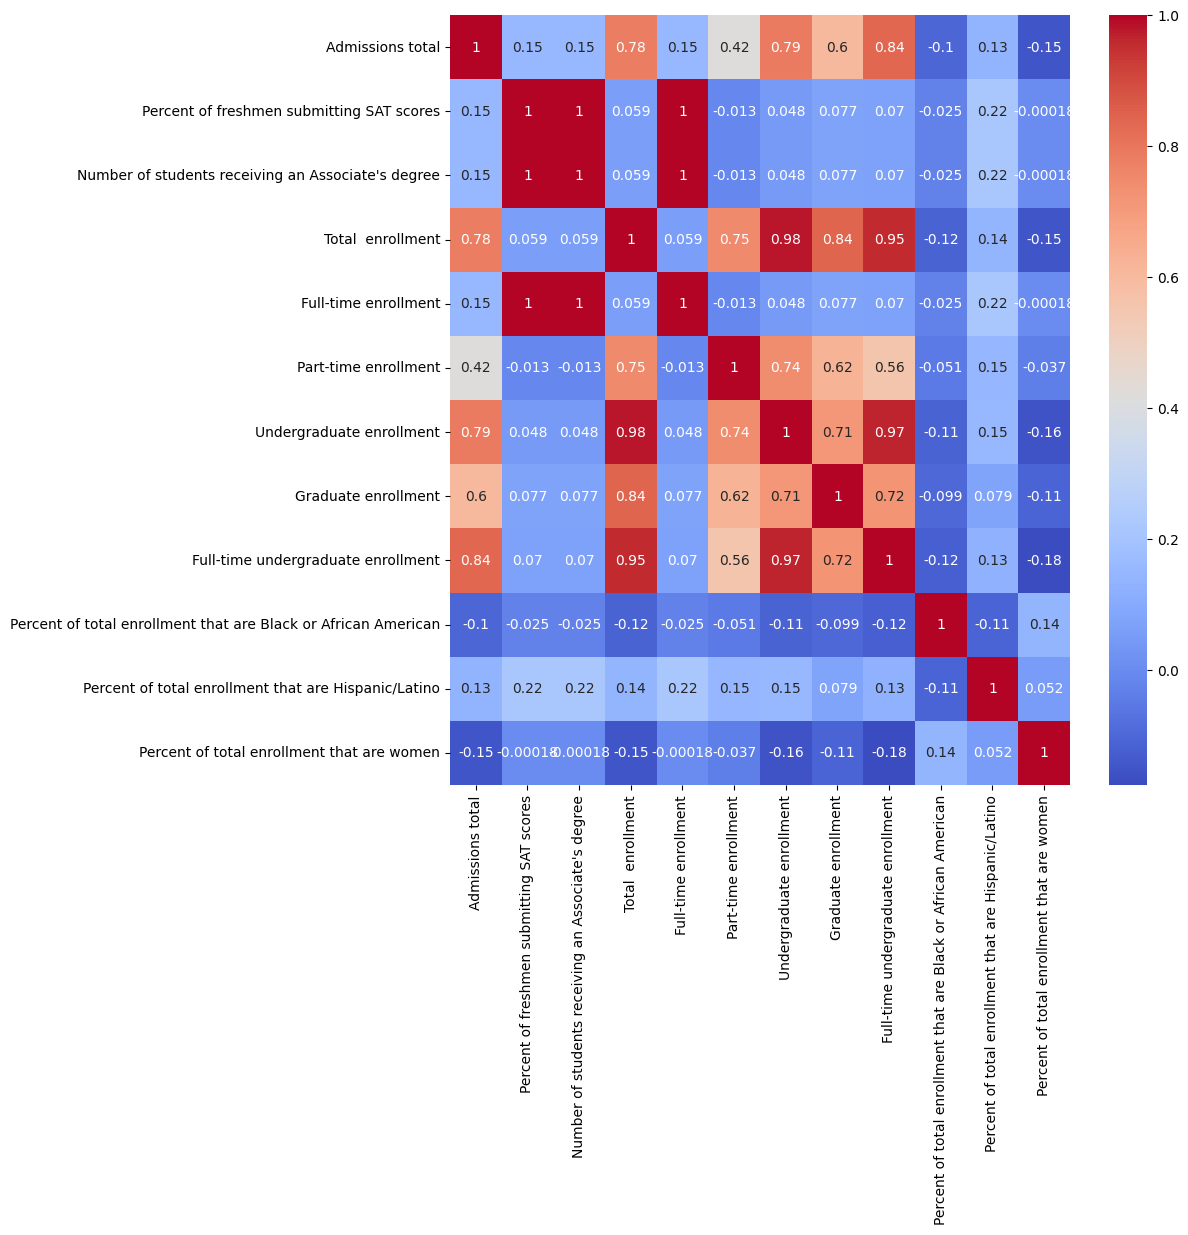

In [79]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax, annot_kws={'fontsize': 10});

## The following are high correlations:

- Total enrollment, undergrade enrollment and other enrollment have high correlation; might delete most and keep one

In [67]:
pd.set_option('display.max_columns', None)
df.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,Number of students receiving an Associate's degree,Percent admitted - total,"Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,Level of institution,Historically Black College or University,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of freshmen receiving any financial aid
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,370.0,450.0,350.0,450.0,15.0,90.0,7182.0,21849.0,27441.0,Alabama,Four or more years,Yes,5020.0,15.0,581.0,4051.0,969.0,3799.0,92.0,1.0,55.0,51.0,97.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,520.0,640.0,520.0,650.0,6.0,87.0,7206.0,22495.0,31687.0,Alabama,Four or more years,No,18568.0,6.0,6607.0,11502.0,7066.0,8357.0,21.0,3.0,61.0,58.0,90.0
2,Amridge University,missing,3555.0,missing,54.0,missing,missing,missing,missing,54.0,missing,6870.0,missing,missing,Alabama,Four or more years,No,631.0,54.0,308.0,322.0,309.0,202.0,40.0,1.0,58.0,61.0,100.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,510.0,640.0,510.0,650.0,34.0,81.0,9192.0,23466.0,35780.0,Alabama,Four or more years,No,7376.0,34.0,2574.0,5696.0,1680.0,4237.0,12.0,3.0,44.0,44.0,87.0
4,Alabama State University,10245.0,5251.0,1479.0,18.0,380.0,480.0,370.0,480.0,18.0,51.0,8720.0,18286.0,25222.0,Alabama,Four or more years,Yes,6075.0,18.0,893.0,5356.0,719.0,4872.0,91.0,1.0,61.0,59.0,93.0


## Multivariate Visualization

Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

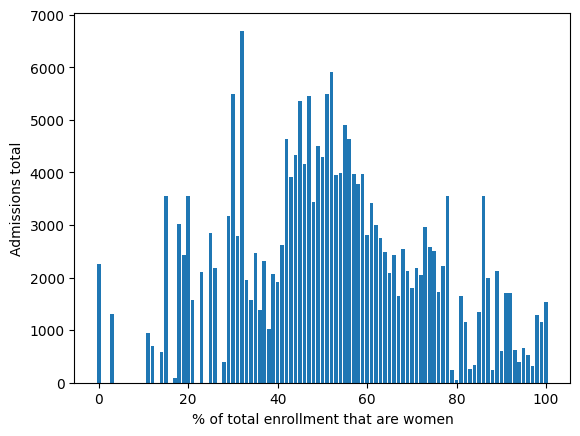

In [23]:
# Use groupby to calculate the average for each category
grad_SAT = df.groupby('Percent of total enrollment that are women')['Admissions total'].mean()

# Plot the average of each as a bar
fig, ax = plt.subplots()
ax.bar(grad_SAT.index, grad_SAT.values);
ax.set_ylabel('Admissions total')
ax.set_xlabel("% of total enrollment that are women");

## Analysis: 
- Schools where there are more than 3,000 admissions have between 40-60% women
- Most shools with more than 80% or less than 30% are smaller schools with less than 2,000 admitted students 

<ipython-input-68-5f26c5fb7ded>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)


[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0'),
 Text(7, 0, '7.0'),
 Text(8, 0, '8.0'),
 Text(9, 0, '9.0'),
 Text(10, 0, '10.0'),
 Text(11, 0, '11.0'),
 Text(12, 0, '12.0'),
 Text(13, 0, '13.0'),
 Text(14, 0, '14.0'),
 Text(15, 0, '15.0'),
 Text(16, 0, '16.0'),
 Text(17, 0, '17.0'),
 Text(18, 0, '18.0'),
 Text(19, 0, '19.0'),
 Text(20, 0, '20.0'),
 Text(21, 0, '21.0'),
 Text(22, 0, '22.0'),
 Text(23, 0, '23.0'),
 Text(24, 0, '24.0'),
 Text(25, 0, '25.0'),
 Text(26, 0, '26.0'),
 Text(27, 0, '27.0'),
 Text(28, 0, '28.0'),
 Text(29, 0, '29.0'),
 Text(30, 0, '30.0'),
 Text(31, 0, '31.0'),
 Text(32, 0, '32.0'),
 Text(33, 0, '33.0'),
 Text(34, 0, '34.0'),
 Text(35, 0, '35.0'),
 Text(36, 0, '36.0'),
 Text(37, 0, '37.0'),
 Text(38, 0, '38.0'),
 Text(39, 0, '39.0'),
 Text(40, 0, '40.0'),
 Text(41, 0, '41.0'),
 Text(42, 0, '42.0'),
 Text(43, 0, '43.0'),
 Text(44, 0, '44.0'),
 Text(45, 0, '46.0'),
 Text(46

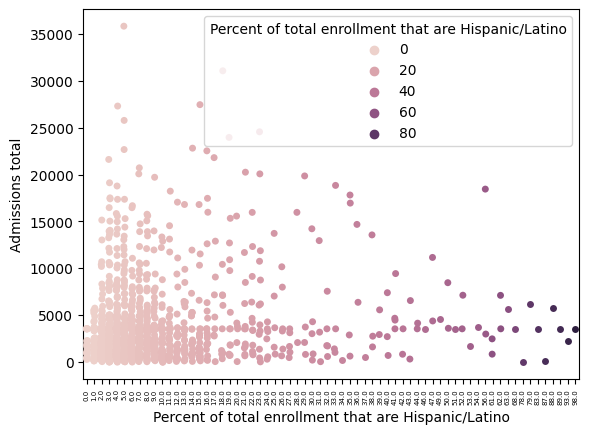

In [68]:
df['Percent of total enrollment that are Hispanic/Latino'] = df['Percent of total enrollment that are Hispanic/Latino'].replace(8.524804177545692, 8)
ax = sns.stripplot(data=df, x='Percent of total enrollment that are Hispanic/Latino', y='Admissions total',
                   hue='Percent of total enrollment that are Hispanic/Latino')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)

#Analysis:

- Most schools have less than 10% of hispanic admissions
- Schools with larger percentage tend to be smallar


<ipython-input-54-fbaecad74542>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)


[Text(0, 0, '0.0'),
 Text(1, 0, '3.0'),
 Text(2, 0, '11.0'),
 Text(3, 0, '12.0'),
 Text(4, 0, '14.0'),
 Text(5, 0, '15.0'),
 Text(6, 0, '17.0'),
 Text(7, 0, '18.0'),
 Text(8, 0, '19.0'),
 Text(9, 0, '20.0'),
 Text(10, 0, '21.0'),
 Text(11, 0, '23.0'),
 Text(12, 0, '25.0'),
 Text(13, 0, '26.0'),
 Text(14, 0, '28.0'),
 Text(15, 0, '29.0'),
 Text(16, 0, '30.0'),
 Text(17, 0, '31.0'),
 Text(18, 0, '32.0'),
 Text(19, 0, '33.0'),
 Text(20, 0, '34.0'),
 Text(21, 0, '35.0'),
 Text(22, 0, '36.0'),
 Text(23, 0, '37.0'),
 Text(24, 0, '38.0'),
 Text(25, 0, '39.0'),
 Text(26, 0, '40.0'),
 Text(27, 0, '41.0'),
 Text(28, 0, '42.0'),
 Text(29, 0, '43.0'),
 Text(30, 0, '44.0'),
 Text(31, 0, '45.0'),
 Text(32, 0, '46.0'),
 Text(33, 0, '47.0'),
 Text(34, 0, '48.0'),
 Text(35, 0, '49.0'),
 Text(36, 0, '50.0'),
 Text(37, 0, '51.0'),
 Text(38, 0, '52.0'),
 Text(39, 0, '53.0'),
 Text(40, 0, '54.0'),
 Text(41, 0, '55.0'),
 Text(42, 0, '56.0'),
 Text(43, 0, '57.0'),
 Text(44, 0, '58.0'),
 Text(45, 0, '59.0'),


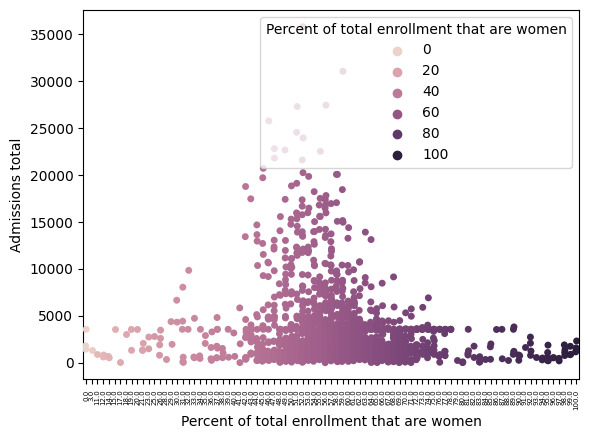

In [54]:
df['Percent of total enrollment that are women'] = df['Percent of total enrollment that are women'].replace(57.911227154047, 57)
ax = sns.stripplot(data=df, x='Percent of total enrollment that are women', y='Admissions total',
                   hue='Percent of total enrollment that are women')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5)

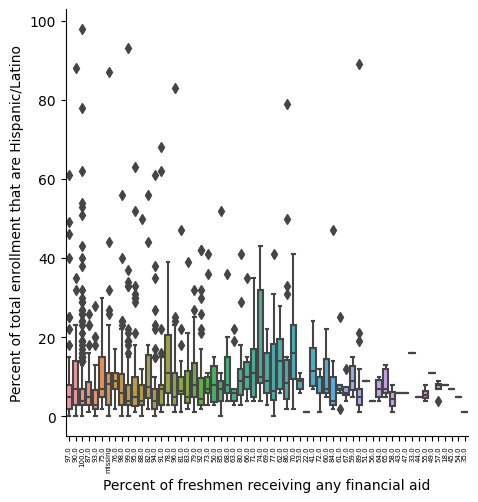

In [46]:
g = sns.catplot(data=df, x='Percent of freshmen receiving any financial aid', y='Percent of total enrollment that are Hispanic/Latino',hue='Percent of freshmen receiving any financial aid',

                kind='box', dodge=False)

g.set_xticklabels(rotation=90, fontsize=5)

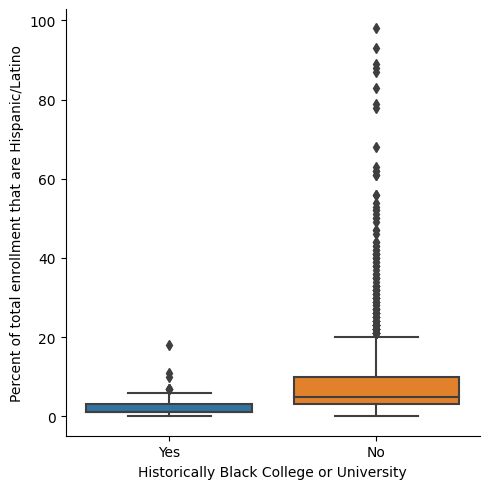

In [74]:
# Using catplot to make a box plot
g = sns.catplot(data=df, x='Historically Black College or University', y='Percent of total enrollment that are Hispanic/Latino',
                   hue='Historically Black College or University',
                kind='box', dodge=False)

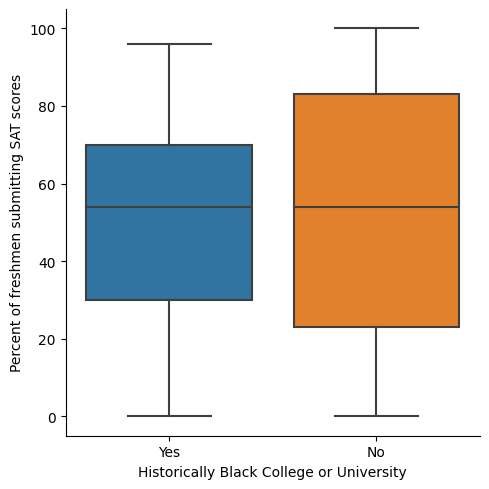

In [77]:
# Using catplot to make a box plot
g = sns.catplot(data=df, x='Historically Black College or University', y='Percent of freshmen submitting SAT scores',
                   hue='Historically Black College or University',
                kind='box', dodge=False)

Text(0.5, 1.0, '# OF TOTAL STUDENTS ADMITTED IN HBCUs compared to non-HBCUs')

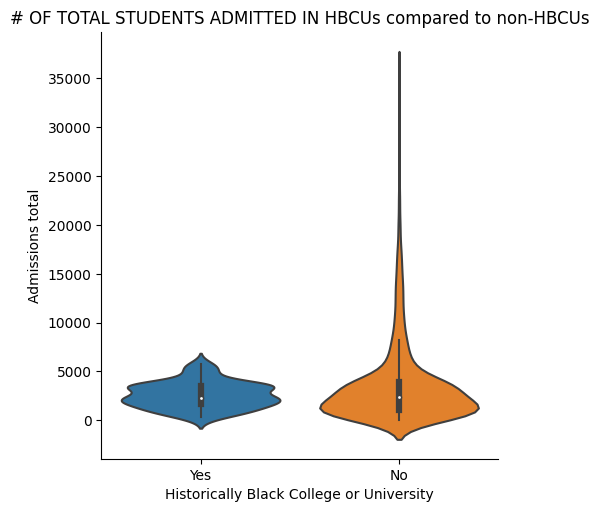

In [87]:
# Using catplot to make a violin plot
g = sns.catplot(data=df, x='Historically Black College or University', y='Admissions total',
                   hue='Historically Black College or University',
                kind='violin', dodge=False)
plt.title('# OF TOTAL STUDENTS ADMITTED IN HBCUs compared to non-HBCUs')

## Key trends Summary:
1. Historically black colleges reflect a lower range across the board including hispanic admissions, women % admissions and % of freshmen have submitted SAT. They have a slightly higher % of women than non-HBCU colleges
2. Texas New Mexico and California have the highest range and average of % of Hispanics enrolled

Text(0.5, 1.0, 'HISPANICS % ENROLLED BY STATE')

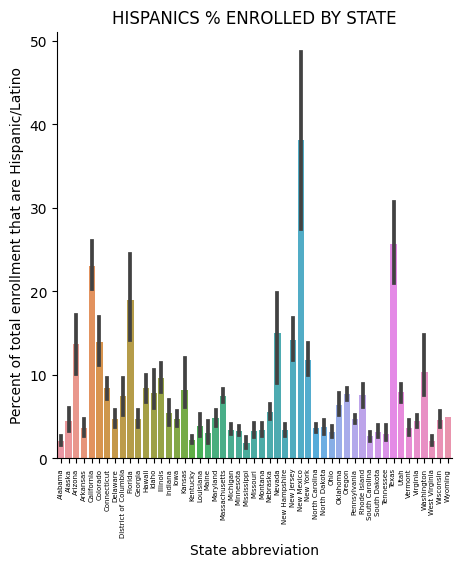

In [93]:
#Visual 1
g = sns.catplot(data=df, x='State abbreviation', y='Percent of total enrollment that are Hispanic/Latino',hue='State abbreviation',
                kind='bar', dodge=False)
g.set_xticklabels(rotation=90, fontsize=5)
plt.title('HISPANICS % ENROLLED BY STATE')


##Visual 1: Hispanics % enrolled by state

- As expected, there are higher percentage of hispanics in states with the highest % of hispanic population. States near the US-Mexican border like Texas, New Mexico and California, the % of hispanics is higher
- I was surprised by the fact NY didn't have a higher %, but makes sense since NY is diversed in many other (non-Latin American) countries as well.

Text(0.5, 1.0, '% OF WOMEN ADMITTED IN HBCUs compared to non-HBCUs')

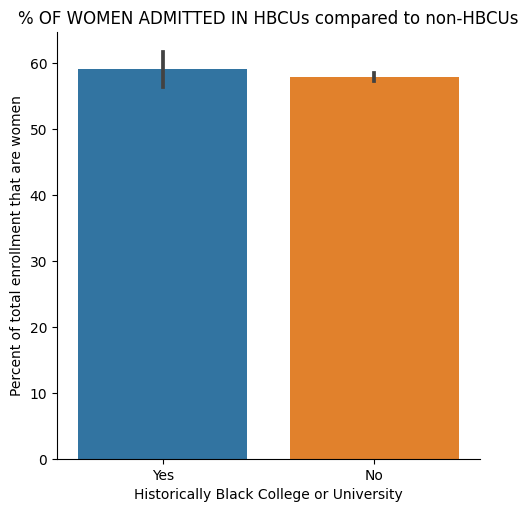

In [92]:
# Using catplot to make a box plot
g = sns.catplot(data=df, x='Historically Black College or University', y='Percent of total enrollment that are women',
                   hue='Historically Black College or University',
                kind='bar', dodge=False)
plt.title('% OF WOMEN ADMITTED IN HBCUs compared to non-HBCUs')

##Visual 2: % OF WOMEN ADMITTED IN HBCUs

- The % of women in historically black colleges are higher than in non-historically black colleges. This is an interesting insight because colleges across the US are struggling to find enough men. This is even more pronounced in the African American community.
- I'd be interested to know what are the steps BHCU are taking to make sure they increase the numbers of males. I'm also interested in the scholarships offered to man compared to females